# Защита персональных данных клиентов

Целью проекта является разработка метода преобразования персональных данных клиентов страховой компании «Хоть потоп» с целью их защиты, для построения модели машинного обучения, предсказывающей потенциальную возможность страховых выплат. 

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  
from numpy.random import RandomState

import warnings
warnings.filterwarnings('ignore')

Читаем содержимое файла /datasets/insurance.csv и выводим типы данных колонок

In [3]:
try:

    data = pd.read_csv('C:\\Users\\User\\Downloads\\insurance.csv')
except:


    data = pd.read_csv('/datasets/insurance.csv')    

In [4]:
display(data.head(5))
print('')
data.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Проверяем наличие пропусков и дубликатов

In [5]:
data.duplicated().sum()

153

В данных 153 полных дубликата. Однако все данные численные и в совокупности даже по каждому отдельному объекту не могут быть эксклюзивными. Полное совпадение таких параметров как пол, возраст, зарплата, количество членов семьи и полученных страховых выплат у 153 клиентов из 5000 вполне реально. В указанной связи от дубликатов избавляться не станем. 

In [6]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Пропуски в данных отсутствуют

Проверим уникальные значения данных, их описание

In [7]:
print('Пол', data['Пол'].sort_values().unique())
print(" ")
print('Возраст', data['Возраст'].sort_values().unique())
print(" ")
print('Члены семьи', data['Члены семьи'].sort_values().unique())
print(" ")
print('Страховые выплаты', data['Страховые выплаты'].sort_values().unique())
print(" ")

Пол [0 1]
 
Возраст [18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 65.]
 
Члены семьи [0 1 2 3 4 5 6]
 
Страховые выплаты [0 1 2 3 4 5]
 


In [8]:
data['Зарплата'].sort_values().unique()

array([ 5300.,  6000.,  7400.,  8900.,  9800., 10000., 10600., 10800.,
       11000., 11200., 11300., 12200., 12900., 13000., 13200., 13300.,
       13400., 13500., 13800., 13900., 14100., 14300., 14400., 14500.,
       14600., 14700., 15000., 15100., 15200., 15600., 15700., 15900.,
       16000., 16200., 16300., 16400., 16500., 16600., 16700., 17000.,
       17100., 17300., 17400., 17500., 17600., 17700., 17800., 17900.,
       18100., 18200., 18300., 18400., 18600., 18700., 18800., 18900.,
       19000., 19100., 19200., 19300., 19400., 19600., 19700., 19900.,
       20000., 20100., 20200., 20300., 20400., 20500., 20600., 20700.,
       20800., 20900., 21000., 21100., 21200., 21300., 21400., 21500.,
       21600., 21700., 21800., 21900., 22000., 22100., 22200., 22300.,
       22500., 22600., 22700., 22800., 22900., 23000., 23100., 23200.,
       23300., 23400., 23500., 23600., 23700., 23800., 23900., 24000.,
       24100., 24200., 24300., 24400., 24500., 24600., 24700., 24800.,
      

<AxesSubplot:>

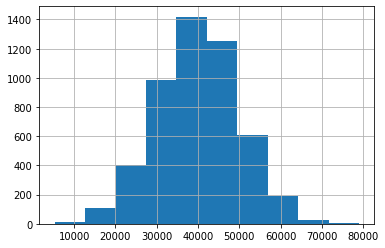

In [9]:
data['Зарплата'].hist()

Данные признаков 'Возраст' и 'Зарплата' приведем к цельночисленному типу, как это представлено в остальных данных.

In [10]:
data[['Возраст', 'Зарплата']] = data[['Возраст', 'Зарплата']].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [11]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


В датасете данные реалистичны. По столбцу 'Пол' сведения категоризированы. В столбцах 'Зарплата' и 'Возраст' усматриваются значения, которые возможно отнести к выбросам, но для выполнения проекта это условие представляется необязательным, в связи с чем из данных ничего не исключается. 

Признаки 'Зарплата' и 'Возраст' многозначные в отличие от остальных признаков, представленных единичным значением. В указанной связи произведем масштабирование этих признаков, однако сделаем это в разделе преобразования данных.



Изучим данные на предмет взаимозависимости, построив матрицу корелляции. Поскольку в нашем проекте признаки являются независимыми переменными, а зависимой переменной является целевой признак - Страховые выплаты, изучим прежде всего его зависимость от остальных признаков.

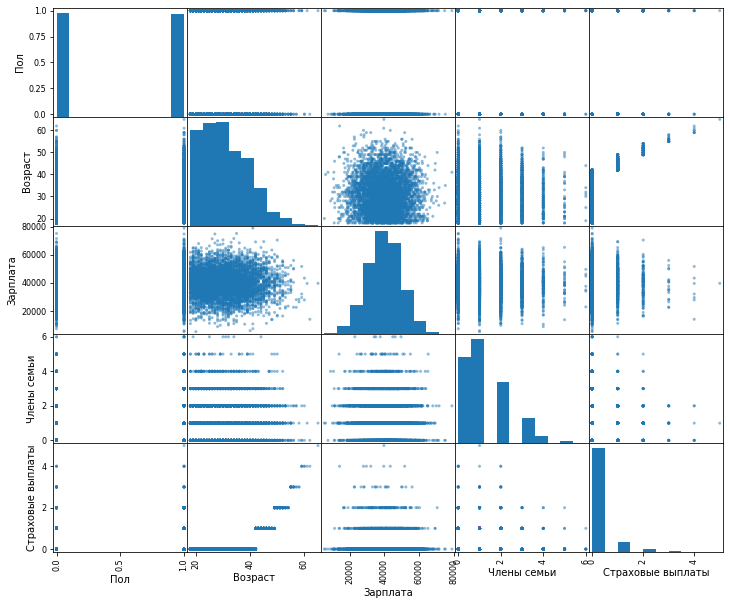

In [12]:
ax = pd.plotting.scatter_matrix(data,figsize=(12, 10))

Имеется прямая пропорциональная зависимость между возрастом  и количеством страховых выплат: чем старше клиент, тем больше у него страховых выплат.

Зависимость количества страховых выплат от остальных признаков практически не просматривается.

In [13]:
print('Страховые выплаты - Возраст:       ', data['Страховые выплаты'].corr(data['Возраст']))
print('Страховые выплаты - Зарплата:     ', data['Страховые выплаты'].corr(data['Зарплата']))
print('Страховые выплаты - Члены семьи:  ', data['Страховые выплаты'].corr(data['Члены семьи']))
print('Страховые выплаты - Пол:           ',data['Страховые выплаты'].corr(data['Пол']))

Страховые выплаты - Возраст:        0.6510300979467255
Страховые выплаты - Зарплата:      -0.01496327636782027
Страховые выплаты - Члены семьи:   -0.03629045878481033
Страховые выплаты - Пол:            0.010139565802024585


 <b> Вывод:</b> изучением данных установлено, что в датасете содержится 5000 объектов, признаки распределены по 4 столбцам, пропуски значений отсутствуют. Установлено 153 полных дубликата, которые не удаляются, так как признаки количественные и даже в своей совокупности их повторение реально.
    
В столбце 'Пол' сведения категоризированы. В признаках 'Зарплата' и 'Возраст' усматриваются значения, которые возможно отнести к выбросам, однако они реалистичны и из данных не исключаются. Эти же признаки необходимо масштабировать, что будет сделано в разделе преобразования данных. 
   
Имеется прямая пропорциональная зависимость между возрастом и количеством страховых выплат: чем старше клиент, тем больше у него страховых выплат.   
    
Предобработка данных состояла в приведении признаков 'Возраст' и 'Зарплата' к цельночисленному типу, как это представлено в остальных данных.

## Умножение матриц

По условию проекта для преобразования признаков с целью их защиты для модели машинного обучения необходимо их умножить на обратимую матрицу и проанализировать изменение качества линейной регрессии. 

Качество линейной регрессии зависит о предсказаний, которые вычисляются по формуле:
$$
a = Xw
$$
где

$X$ — матрица признаков (нулевой столбец состоит из единиц)

$w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу).

Посмотрим, как изменится $a$, если уножить матрицу признаков $X$ на обратимую матрицу $P$.

Вектор весов линейной регрессии вычисляется по формуле:
$$
w = (X^T X)^{-1} X^T y
$$
где $X$ - известная нам переменная (матрица признаков), а 

$y$ — вектор целевого признака. 

Подставим в формулу предсказаний вместо $w$ формулу вектора весов и получим:

$$
a = X(X^T X)^{-1} X^T y
$$

Произведение матрицы признаков на обратимую матрицу с нашими переменными будет выглядеть так:

$$
XP
$$    
а формула предсказаний по матрице признаков $X$, умноженной на обратимую матрицу $P$,следующим образом:
    
$$
a = XP((XP)^T XP)^{-1} (XP)^T y
$$    

Для вычислений воспользуемся теоремой: транспонирование произведения матриц равно произведению транспонированных матриц, взятых в обратном порядке, то есть для нашей формулы:

$$
(XP)^T = P^TX^T
$$

Теперь наша формула предсказаний будет выглядеть так:

$$
a = XP(P^TX^T XP)^{-1} (XP)^T y
$$    

В выражении $(P^TX^T XP)^{-1}$ произведение трех квадратных матриц: $P^T$, $(X^T X)$, $P$ одинакового рзмера. Не переставляя местами матрицы можно выполнить умножение в таком порядке: 

$$
P^T(X^T X)P
$$ 

где $((X^T X)P)$ - тоже квадратная матрица


Теперь можно применить теорему об обратной матрице произведения матриц, верную для квадратных матриц, согласно которой матрица, обратная произведению двух матриц, равна произведению их обратных матриц, взятых в обратном порядке.Так, 

$$
(P^TX^T XP)^{-1} = (P^T((X^T X)P))^{-1} = ((X^T X)P)^{-1}(P^T)^{-1} = P^{-1}(X^T X)^{-1}(P^T)^{-1}
$$ 



Подставим это выражение в формулу предсказаний:

$$
a = XPP^{-1}(X^T X)^{-1}(P^T)^{-1}(XP)^Ty                                 
$$  


Опять воспользуемся теоремой транспонирования произведения матриц для выражения: 
$$
(XP)^T = P^TX^T
$$

тоже подставим его в формулу предсказаний и получим:


$$
a = XPP^{-1}(X^T X)^{-1}(P^T)^{-1}P^TX^Ty                                 
$$


В нашей формуле мы получили квадратные матрицы  $P$ и $P^T$ и обратные им матрицы $P^{-1}$ и $(P^T)^{-1}$ соответственно. Для квадратной матрицы будет верным утверждение: произведение матрицы на обратную матрицу в любом порядке равно единичной матрице. То есть:

$$
PP^{-1} = E   
$$

$$
P^T (P^T)^{-1} =  E
$$

где $E$ - единичная матрица.


Если любую матрицу $X$ умножить на единичную (или наоборот), получится эта же самая матрица $X$. То есть верным будет выражение:


$$
XPP^{-1}(P^T)^{-1}P^T = X 
$$ 

Результат этого выражения подставим в формулу предсказаний


$$
a = X(X^TX)^{-1} X^Ty
$$ 

но выражение $(X^TX)^{-1} X^Ty$ это и есть наша формула весов  $w$, подставим ее в формулу предсказаний и получим 

$$
a = Xw
$$ 

То есть, при умножении матрицы признаков на квадратную матрицу предсказания, а значит и качество линейной регрессии не изменятся.







<b> Вывод:</b> По условию проекта необходимо исследовать как изменится качество модели линейной регрессии при умножении признаков на обратимую матрицу. Матричным уравнением, в котором были использованы теоремы об обратной матрице произведения матриц, а также транспонирования произведения матриц, установлено что предсказания модели, а значит и качество линейной регрессии не поменяются. Параметры линейной регрессии $𝑤$ в исходной задаче и в преобразованной вычисляются по одним и тем же переменным $𝑋$ - исходной матрице признаков и $𝑦$ - целевого признака. 

Посмотрим как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


Пусть $w$ - параметры линейной регрессии, построенной на признаках $X$, а $w_p$ - построенной на признаках $XP$, где $P$ - обратимая матрица, тогда формулы весов обеих моделей будут иметь вид:

$$
w = (X^T X)^{-1} X^T y
$$
    
    
$$
w_P = ((XP)^T XP)^{-1} (XP)^T y
$$   

Используя приведенные выше теоремы представим $w_p$ следующим образом:


$$
w_P = ((XP)^T XP)^{-1} (XP)^T y 
$$

$$
w_P = (P^TX^T XP)^{-1} (XP)^T y    
$$


$$
w_P = (P^T((X^T X)P))^{-1} (XP)^T y 
$$


$$
w_P = ((X^T X)P)^{-1}(P^T)^{-1}P^TX^T y
$$

$$
w_P = P^{-1}(X^T X)^{-1}(P^T)^{-1}P^TX^T y
$$


$$
w_P = P^{-1}(X^T X)^{-1}X^T y
$$

Но выражение $(X^T X)^{-1}X^Ty$ это  и есть наш вектор весов $w$ модели, построенной на признаках $X$, значит мы пришли к выражению:

$$
w_P = P^{-1}w
$$



Исследуя связь параметров линейной регрессии в исходной задаче и в преобразованной, мы пришли к выводу, что вектор весов преобразованной модели линейной регрессии равен произведению матрицы, обратной той, на которую умножались признаки исходной модели, и вектора  весов исходной модели. 

##  Алгоритм преобразования

Теоретически мы получили результат, свидетельствующий, что при умножении матрицы признаков на квадратную матрицу качество линейной регрессии не изменятся. Теперь проверим это на нашем датасете.В указанной связи предпримем следующее:

разделим исходный датасет на учебную (для обучения модели) и тестовую (для получения предсказаний модели)выборки; 

построим модель линейной регрессии на исходных признаках, проверим корректность работы по формуле, качество проверим метрикой R2 значение которой этой и иных моделей сохраним в отдельных переменных для последующей визуализации;

масштабируем признаки;

проведем преобразование признаков по следующему алгоритму: 

представим масштабированные признаки датасета в виде матрицы;

создадим квадратную матрицу случайных чисел;

умножим квадратную матрицу на матрицу признаков.

Сгенерированная матрица должна быть обратимой, размер матрицы должен позволять произвести умножение на матрицу признаков, то есть высота новой матрицы должна быть равна ширине матрицы признаков. 

###  Построение модели на исходных данных

Выделяем признаки и целевой признак, делим данные на учебную и тестовую выборки

In [14]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

STATE = RandomState(2023)

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=STATE)

Строим модель на исходных данных

In [15]:
original_model = LinearRegression().fit(features_train, target_train)
original_predicted = original_model.predict(features_test)

print("R2 =", r2_score(target_test, original_predicted))
a = round((r2_score(target_test, original_predicted)),4)
a

R2 = 0.3899836481873804


0.39

Проверяем корректность работы модели

Добавляем в матрицу признаков $X$ нулевой столбец, состоящий из единиц, 

записываем вектор значений целевого признака, 

создаем вектор весов

In [16]:
X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
y = target_train 
w = np.linalg.inv(X.T@X)@X.T@y

Выводим коэффициенты регрессии и величину сдвига, полученные по формуле,а также в результате обучения модели.

In [17]:
print('Коэффициенты регрессии преобразованной модели  ', original_model.coef_)
print('Коэффициенты регрессии, рассчитанные по формуле', w[1:])
print('')
print('Величина сдвига преобразованной модели  ', original_model.intercept_)
print('Величина сдвига, рассчитанная по формуле', w[0])

Коэффициенты регрессии преобразованной модели   [ 6.64362767e-03  3.65296316e-02 -1.00170627e-07 -1.35755279e-02]
Коэффициенты регрессии, рассчитанные по формуле [ 6.64362767e-03  3.65296316e-02 -1.00170627e-07 -1.35755279e-02]

Величина сдвига преобразованной модели   -0.9629637971974377
Величина сдвига, рассчитанная по формуле -0.9629637971974326


Коэффициенты регрессии и величина сдвига совпадают.

### Масштабирование данных

Масштабируем признаки 'Возраст', 'Члены семьи' и 'Зарплата' в учебной и тестовых выборках.

In [18]:
n = ['Возраст', 'Зарплата', 'Члены семьи']

scaler = StandardScaler()

scaler.fit(features_train[n]) 
features_train[n] = scaler.transform(features_train[n])
display(features_train.head(3))
features_train.info()

features_test[n] = scaler.transform(features_test[n])
display(features_test.head(3))
features_test.info()

,Пол,Возраст,Зарплата,Члены семьи
1767,0,-0.122539,-0.012422,0.718481
2173,1,-0.240154,-0.801800,2.534660
463,0,2.464994,-0.528554,0.718481


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 1767 to 4951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Пол          3750 non-null   int64  
 1   Возраст      3750 non-null   float64
 2   Зарплата     3750 non-null   float64
 3   Члены семьи  3750 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 146.5 KB


,Пол,Возраст,Зарплата,Члены семьи
3559,0,-0.122539,0.665633,0.718481
3409,1,0.818382,-0.892882,-0.189609
3389,1,-0.357770,0.210223,-0.189609


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 3559 to 3713
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Пол          1250 non-null   int64  
 1   Возраст      1250 non-null   float64
 2   Зарплата     1250 non-null   float64
 3   Члены семьи  1250 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 48.8 KB


В результате масштабирования первоначальные значения признаков, за исключением "Пол", значительно видоизменились.

### Преобразованние признаков путем умножения на матрицу

После масштабирования признаков они утратили свои первоначальные значения, по по условию проекта нам необходимо преобразовать исходные данные путем умножения на обратимую матрицу.

Создаем матрицу признаков на учебной и тестовой выборках.

In [19]:
features_matrix_train = features_train.values
print('Матрица признаков учебной выборки')
print(features_matrix_train)
print(features_matrix_train.shape)
print('')
features_matrix_test = features_test.values
print('Матрица признаков тестовой выборки')
print(features_matrix_test)
features_matrix_test.shape

Матрица признаков учебной выборки
[[ 0.         -0.12253933 -0.01242219  0.71848069]
 [ 1.         -0.2401545  -0.80180012  2.53466039]
 [ 0.          2.46499446 -0.52855392  0.71848069]
 ...
 [ 1.          0.81838205 -0.34638978  0.71848069]
 [ 1.          0.34792136 -0.8625215  -0.18960916]
 [ 0.          0.34792136  0.07865988 -0.18960916]]
(3750, 4)

Матрица признаков тестовой выборки
[[ 0.         -0.12253933  0.66563321  0.71848069]
 [ 1.          0.81838205 -0.89288219 -0.18960916]
 [ 1.         -0.35776967  0.21022287 -0.18960916]
 ...
 [ 1.         -1.18107588  0.28106448  0.71848069]
 [ 1.          1.17122757 -0.74107875 -1.09769901]
 [ 1.          0.93599722  0.09890034  0.71848069]]


(1250, 4)

Для создания обратимой матрицы применим функцию. Чтоб размер матрицы позволял произвести умножение на матрицу признаков (высота новой матрицы равна ширине матрицы признаков), в качестве параметра размера передадим features_train.


In [21]:
def get_rand_matrix():
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(features_train.shape[1], features_train.shape[1]))
        det = np.linalg.det(matrix)
    return matrix
g = get_rand_matrix()
g

array([[ 0.55420642,  0.54245474, -0.39998983,  0.3091532 ],
       [-3.05087437, -0.04438528,  0.67697143, -0.20773745],
       [ 0.18487217,  0.85233763, -0.4767023 , -1.93553698],
       [-0.10312545, -0.44940118, -0.5383032 , -0.08449206]])

Умножаем матрицы признаков учебной и тестовой выборок на сгенерированную обратимую матрицу g.

In [22]:
features_g_train = features_matrix_train@g
print('Преобразованная матрица признаков учебной выборки')
print('')
print(features_g_train)
print('')
features_g_test = features_matrix_test@g
print('Преобразованная матрица признаков тестовой выборки')
features_g_test

Преобразованная матрица признаков учебной выборки

[[ 0.29746193 -0.32803503 -0.46379439 -0.01120629]
 [ 0.8772691  -1.26936973 -1.54476341  1.69679741]
 [-7.69219699 -0.88280193  1.53393324  0.45025808]
 ...
 [-2.08070589 -0.11199649 -0.06760422  0.74888892]
 [-0.64716065 -0.12293681  0.34877619  1.92233964]
 [-1.02736881  0.13681277  0.3001027  -0.20850493]]

Преобразованная матрица признаков тестовой выборки


array([[ 0.42281551,  0.24989711, -0.78702496, -1.32360761],
       [-2.08808995, -0.16969589,  0.68173765,  1.88337158],
       [ 1.70413463,  0.82272589, -0.64033618, -0.0073983 ],
       ...,
       [ 4.1353879 ,  0.51155288, -1.72028899, -0.05020971],
       [-3.04286589,  0.3521274 ,  1.3370666 ,  1.59297754],
       [-2.35721325,  0.26232065, -0.20025293, -0.13741965]])

В результате преобразования признаков путем умножения матрицы признаков на обратимую матрицу все признаки исходного датасета утратили свои первоначальные значения. 

<b> Вывод:</b>Алгоритм преобразования данных с целью защиты информации клиентов страховой компании «Хоть потоп» состоял в следующем:

масштабированы (за исключением 'Пол') и представлены в виде матрицы признаки исходного датасета; 

сгенерирована обратимая матрица случайных чисел с высотой, равной ширине матрицы признаков исходного датасета;

получена новая матрица признаков путем умножения квадратной матрицы на матрицу масштабированных признаков.  
    
В результате преобразования  все признаки исходного датасета утратили свои первоначальные значения.

## Проверка алгоритма

Для проверки верности наших выводов о неизменности качества линейной регрессии до и после умножения матрицы признаков на обратимую матрицу обучим две модели на масштабированных признаках и на признаках, преобразованных путем умножения на обратимую матрицу.

###  Построение моделей линейной регрессии

Строим модель на масштабированных признаках

In [23]:
model_scale = LinearRegression().fit(features_train, target_train)
predicted_scale = model_scale.predict(features_test)

print("R2 =", r2_score(target_test, predicted_scale))

b = round((r2_score(target_test, predicted_scale)),4)
b

R2 = 0.3899836481873805


0.39

Строим модель на признаках, полученных путем умножения набора признаков (масштабированных) на обратимую матрицу.

In [24]:
model_matrix = LinearRegression()
model_matrix.fit(features_g_train, target_train)
predicted_matrix = model_matrix.predict(features_g_test)
print("R2 =", r2_score(target_test, predicted_matrix))

c = round((r2_score(target_test, predicted_matrix)),4)
c

R2 = 0.38998364818738074


0.39

### Визуализация метрики R2 разных моделей

Для визуализации метрики R2 моделей, построенных на исходных данных, масштабированных, масштабированных и преобразованных путем умножения на обратимую матрицу, создадим датафрейм из данных R2 разных моделей, которые мы сохранили в отдельных переменных.

In [25]:
pd.DataFrame(data= [a, b, c], 
                    columns=['R2'], 
                     index=['Линейная регрессия',
                            'Линейная регрессия c масштабом',
                            'Линейная регрессия c масштабом и преобразованием признаков'])      

,R2
Линейная регрессия,0.39
Линейная регрессия c масштабом,0.39
Линейная регрессия c масштабом и преобразованием признаков,0.39


<b> Вывод:</b> Алгоритм преобразования проверен путем построения моделей линейной регрессии - на масштабированных признаках и на признаках, полученных в результате умножения обратимой матрицы на матрицу масштабированных признаков. 

R2 обеих моделей одинаково и равно 0.3899, что подтвердило вывод  матричного уравнения о неизменности качества линейной регрессии при преобразовании признаков путем умножения исходных на обратимую матрицу.    


<b> Итоговый вывод:</b> В соответствии с условием проекта разработан метод преобразования с целью защиты персональных данных клиентов страховой компании «Хоть потоп», используемых в построении модели машинного обучения, предсказывающей потенциальную возможность страховых выплат.

Датасет состоит из 5000 объектов, 4 признаков и целевого признака. Установлена прямая пропорциональная зависимость между возрастом и количеством страховых выплат.Несмотря на наличие выбросов в признаках 'Зарплата' и 'Возраст' и 153 полных дубликатов из данных ничего не исключалось, так как они реалистичны. Предобработка данных состояла в приведении признаков 'Возраст' и 'Зарплата' к цельночисленному типу. 

В ходе исследования вопроса как изменится качество модели линейной регрессии при умножении признаков на обратимую матрицу  матричным уравнением, в котором были использованы теоремы об обратной матрице произведения матриц, а также транспонирования произведения матриц, установлено что предсказания модели, а значит и качество линейной регрессии не поменяются. 
    
Исследуя связь параметров линейной регрессии в исходной задаче и в преобразованной, мы пришли к выводу, что вектор весов преобразованной модели линейной регрессии равен произведению матрицы, обратной той, на которую умножались признаки исходной модели, и вектора весов исходной модели.    

Алгоритм преобразования данных с целью защиты информации клиентов страховой компании «Хоть потоп» состоял в следующем:
масштабированы (за исключением 'Пол') и представлены в виде матрицы признаки исходного датасета, сгенерирована обратимая матрица случайных чисел с высотой, равной ширине матрицы признаков исходного датасета, получена новая матрица признаков путем умножения квадратной матрицы на матрицу масштабированных признаков.

Обучены две модели линейной регрессии - на масштабированных признаках и на признаках, полученных в результате умножения обратимой матрицы на матрицу масштабированных признаков.

Метрики качества R2 обеих моделей одинаковы и равны 0.3899, что подтвердило вывод матричного уравнения о неизменности качества линейной регрессии при преобразовании признаков путем умножения исходных на обратимую матрицу.    